In [2]:
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter 
import matplotlib.gridspec as gridspec
import os 
import glob
import re
import nc_time_axis
import time 
import pandas as pd 

/tmp/ipykernel_76201/517699830.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


In [3]:
filepath_med = '/home/home02/cm21cmr/spectral_irradiance_Lean_1950-2014_daily_GOME-Mg_Leap_c150623.nc'
filepath_cli = '/resstore/b0243/Data/Sporadic_E/WACCM_Input_Data/Solar_Data/spectral_irradiance_Lean_1950-2014_daily_GOME-Mg_Leap_c150623.nc'
filepath_max = '/nobackup/phydrm/SpE/Smax_spectral_irradiance_cycle22.nc'
filepath_min = '/nobackup/phydrm/SpE/Smin_spectral_irradiance_cycle21.nc'

ds_sol_med = xr.open_dataset(filepath_med, decode_times = False)
ds_sol_cli = xr.open_dataset(filepath_cli, decode_times = False)
ds_sol_max = xr.open_dataset(filepath_max, decode_times = False)
ds_sol_min = xr.open_dataset(filepath_min, decode_times = False)

In [4]:
ds_sol_med = xr.open_dataset(filepath_med, decode_times = False)
ds_sol_med

<xarray.Dataset>
Dimensions:         (wavelength: 3780, time: 23741, ref_time_bound: 2)
Coordinates:
  * ref_time_bound  (ref_time_bound) float64 6.696e+05 6.816e+05
  * wavelength      (wavelength) float64 120.5 121.5 ... 9.992e+04 9.998e+04
Dimensions without coordinates: time
Data variables:
    band_width      (wavelength) float64 ...
    date            (time) float64 ...
    ssi             (time, wavelength) float64 ...
    ssi_ref         (wavelength) float64 ...
    tsi             (time) float64 ...
    tsi_ref         float64 ...
Attributes:
    notes:                     \nData derived by Judith Lean, jlean@ssd5.nrl....
    scaling:                   \nAbsolute spectral and total irradiance inclu...
    history:                   Tue Jun 23 12:37:10 2015: ncrcat spectral_irra...
    Source_data:               \nhttp://www.geo.fu-berlin.de/en/met/ag/strat/...
    Source_website:            \nhttp://www.geo.fu-berlin.de/en/met/ag/strat/...
    title:                     \nLean daily solar irradiance for 19500101-201...
    creator:                   \nMike Mills, mmills@ucar.edu
    creation_date:             \nWed Feb 27 14:56:27 MST 2013
    nco_openmp_thread_number:  1
    NCO:                       4.4.2

In [5]:
ds_med_tsl = ds_sol_med.isel(time=18362)
ds_cli_tsl = ds_sol_cli.isel(time=18362)
ds_max_tsl = ds_sol_max.isel(time=1)
ds_min_tsl = ds_sol_min.isel(time=1)
ds_diff = ((ds_max_tsl - ds_min_tsl)/ds_min_tsl)*100

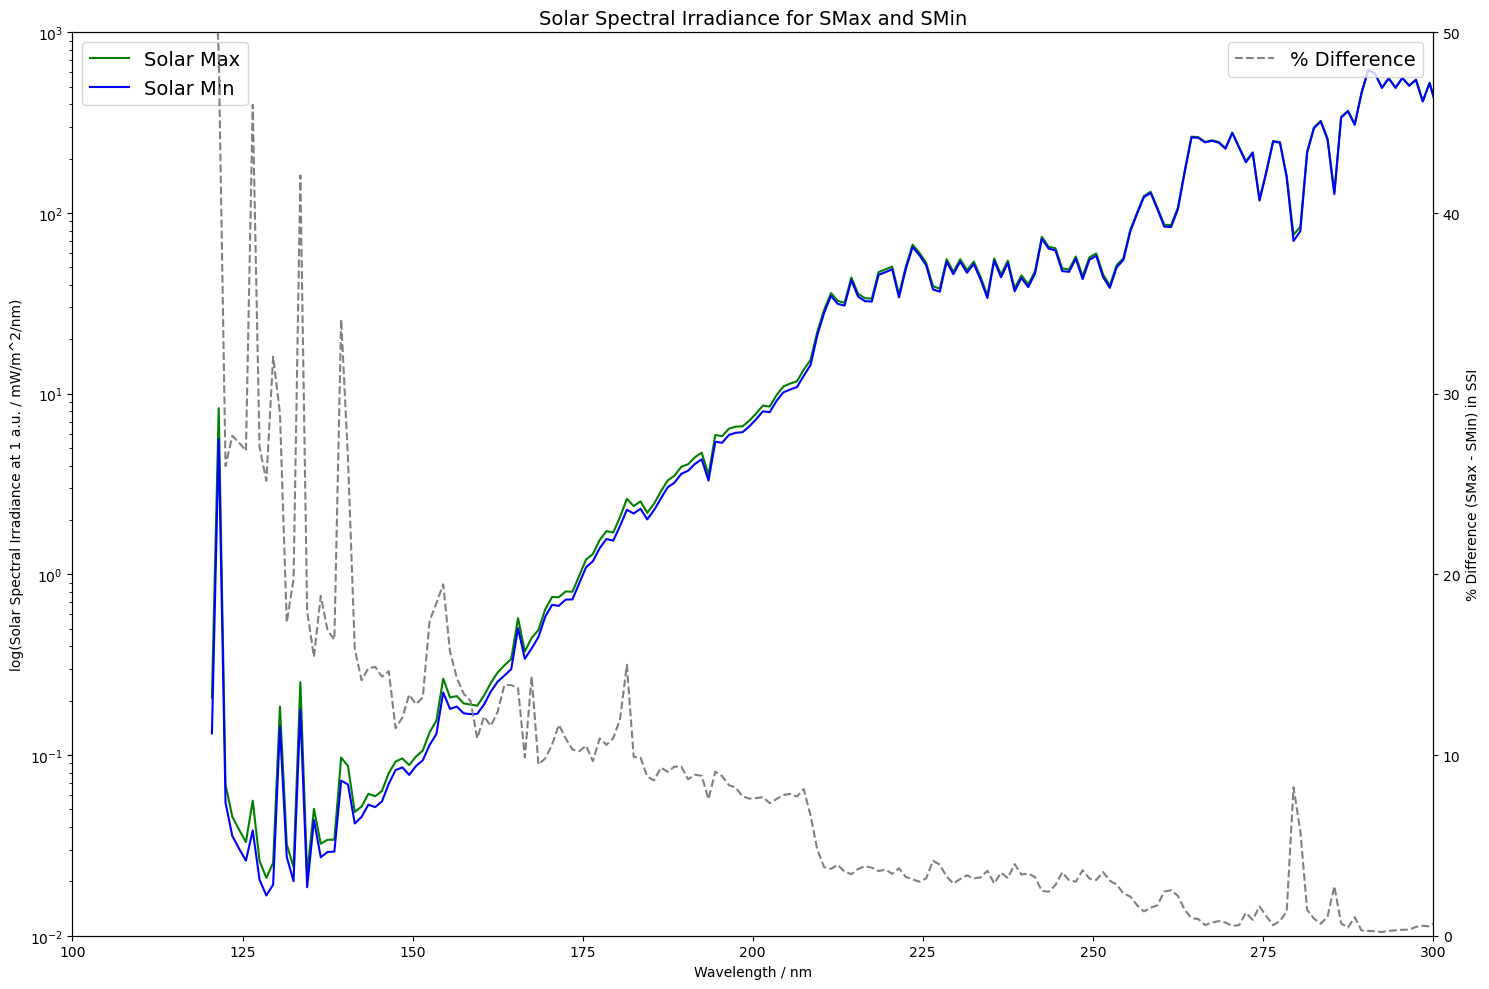

In [6]:
fig, ax =plt.subplots(figsize=(15,10))

# ax.plot(ds_med_tsl['wavelength'], 
#         ds_med_tsl['ssi'],
#         color='black',
#         label='Solar Med',
#         marker='o'
#        )

# ax.plot(ds_cli_tsl['wavelength'], 
#         ds_cli_tsl['ssi'],
#         color='red',
#         label='01/01/2000 used for 2100',
#         # marker='o'
#        )

ax.plot(ds_max_tsl['wavelength'], 
        ds_max_tsl['ssi'],
        color='green',
        label='Solar Max',
        # marker='^'
        )

ax.plot(ds_min_tsl['wavelength'], 
        ds_min_tsl['ssi'],
        color='blue',
        label='Solar Min',
        # marker='x'
        )

ax.set_yscale('log')
ax.set_xbound(lower=100, upper=300)
ax.set_ybound(lower=1e-2, upper=1e3)
ax.set_xlabel('Wavelength / nm')
ax.set_ylabel('log(Solar Spectral Irradiance at 1 a.u. / mW/m^2/nm)')

ax2 = ax.twinx()
ax2.plot(ds_diff['wavelength'], 
         ds_diff['ssi'],
         color='gray',
         linestyle='dashed',
         label='% Difference'
        )
ax2.set_xbound(lower=100, upper=300)
ax2.set_ybound(lower=0, upper=50)
ax2.set_ylabel('% Difference (SMax - SMin) in SSI')

ax.set_title('Solar Spectral Irradiance for SMax and SMin', fontsize=14)
ax.legend(fontsize=14)
ax2.legend(fontsize=14)

plt.tight_layout()
plt.savefig(f'/home/home02/cm21cmr/Sporadic-E-Project/Figures/solar_SMin_vs_SMax' , dpi=400, bbox_inches='tight')
plt.show()

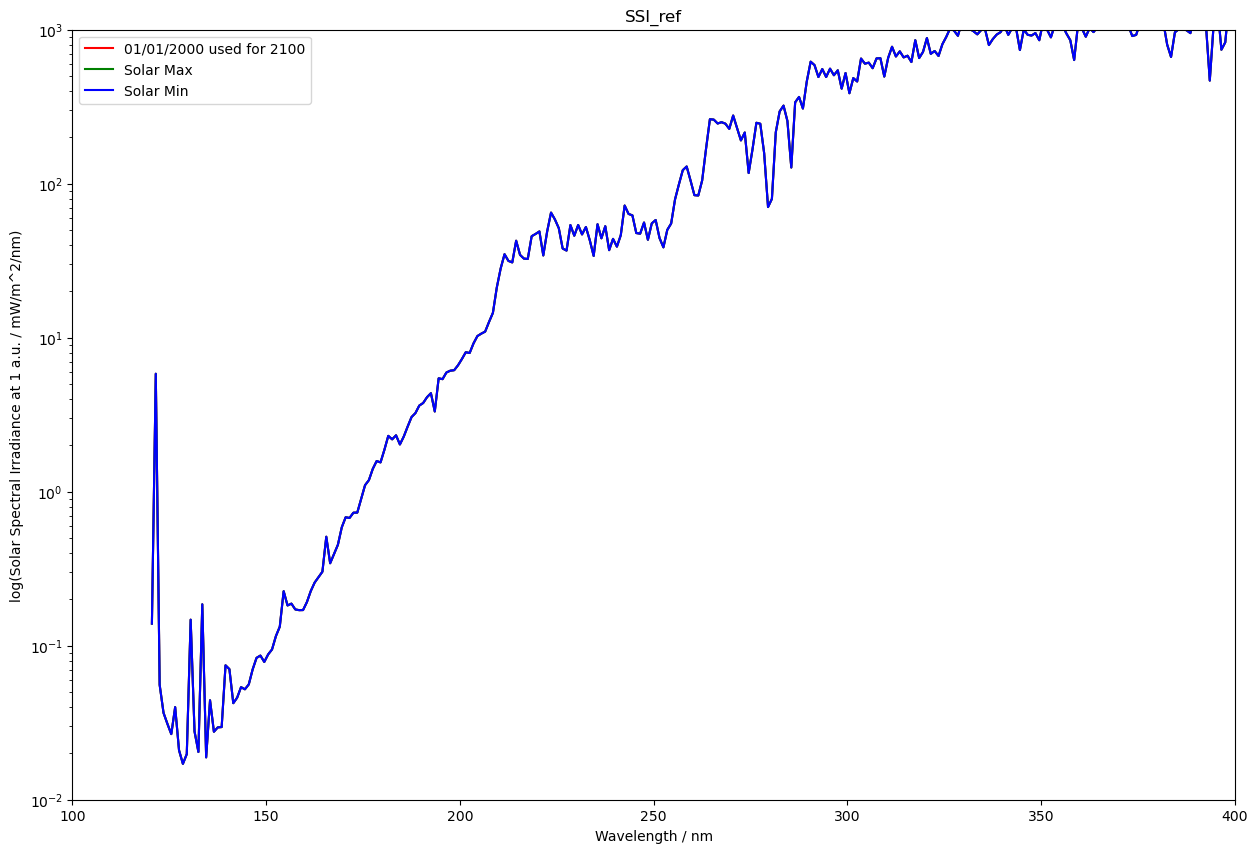

In [11]:
fig, ax =plt.subplots(figsize=(15,10))

ax.plot(ds_cli_tsl['wavelength'], 
        ds_cli_tsl['ssi_ref'],
        color='red',
        label='01/01/2000 used for 2100',
        # marker='o'
       )

ax.plot(ds_sol_max['wavelength'], 
        ds_sol_max['ssi_ref'],
        color='green',
        label='Solar Max',
        # marker='^'
        )

ax.plot(ds_sol_min['wavelength'], 
        ds_sol_min['ssi_ref'],
        color='blue',
        label='Solar Min',
        # marker='x'
        )

ax.set_yscale('log')
ax.set_xbound(lower=100, upper=400)
ax.set_ybound(lower=1e-2, upper=1e3)
ax.legend()
ax.set_xlabel('Wavelength / nm')
ax.set_ylabel('log(Solar Spectral Irradiance at 1 a.u. / mW/m^2/nm)')
ax.set_title('SSI_ref')
plt.show()

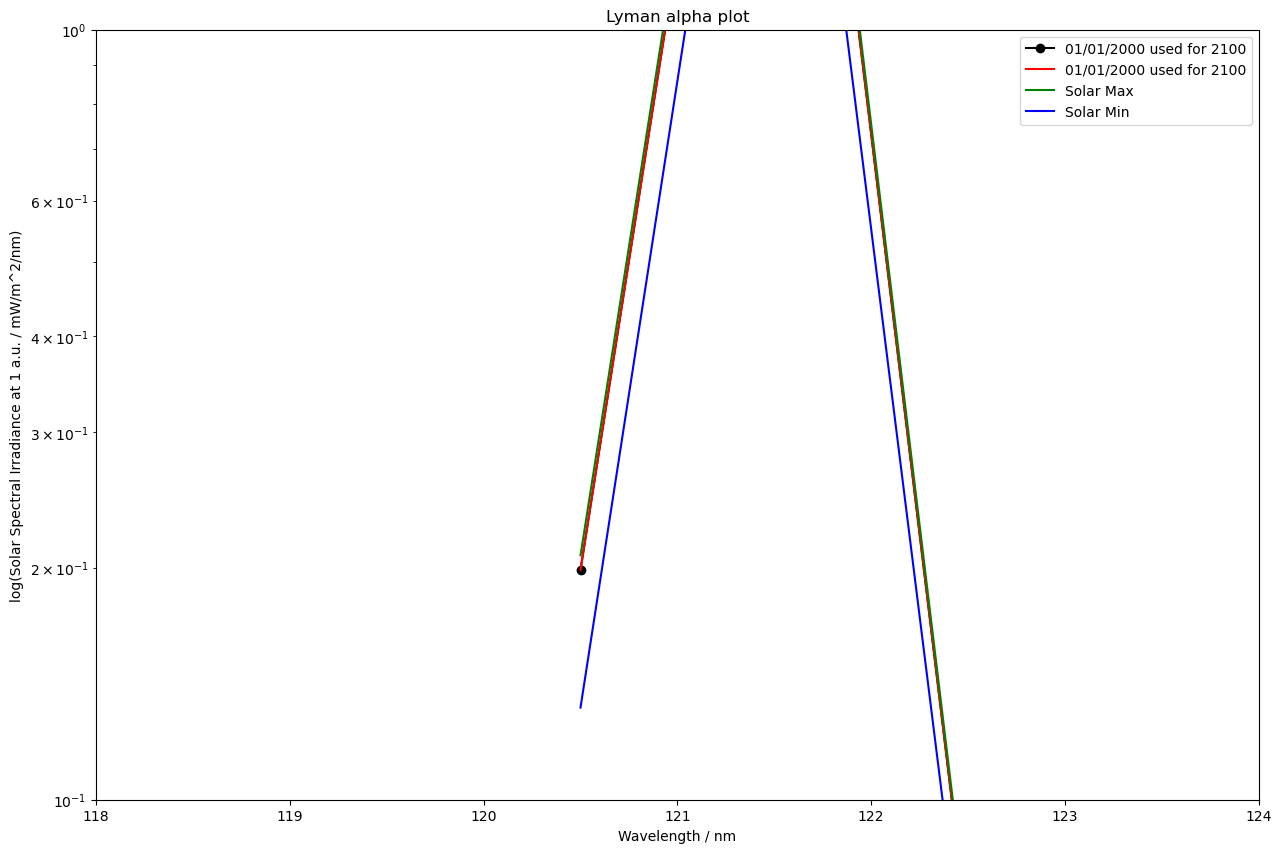

In [14]:
fig, ax =plt.subplots(figsize=(15,10))

ax.plot(ds_med_tsl['wavelength'], 
        ds_med_tsl['ssi'],
        color='black',
        label='01/01/2000 used for 2100',
        marker='o'
       )

ax.plot(ds_cli_tsl['wavelength'], 
        ds_cli_tsl['ssi'],
        color='red',
        label='01/01/2000 used for 2100',
        # marker='o'
       )

ax.plot(ds_max_tsl['wavelength'], 
        ds_max_tsl['ssi'],
        color='green',
        label='Solar Max',
        # marker='^'
        )

ax.plot(ds_min_tsl['wavelength'], 
        ds_min_tsl['ssi'],
        color='blue',
        label='Solar Min',
        # marker='x'
        )

ax.set_yscale('log')
ax.set_xbound(lower=118, upper=124)
ax.set_ybound(lower=1e-1, upper=1)
ax.legend()
ax.set_xlabel('Wavelength / nm')
ax.set_ylabel('log(Solar Spectral Irradiance at 1 a.u. / mW/m^2/nm)')
ax.set_title('Lyman alpha plot')
plt.show()